<a href="https://colab.research.google.com/github/yualapshina/ccxxxi-statistics/blob/main/ccxxxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def findexact(str, substr, index=0):
  offset = str.find(substr)
  ln = len(substr)
  if not index:
    return offset
  return offset + ln + findexact(str[offset+ln :], substr, index-1)

In [ ]:
!pip install gdown
!pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gdown
import docx2txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, accuracy_score

In [ ]:
!gdown 12PfGMG4aAXA-dTJ3QmhN0crpqf_4WyZb

Downloading...
From: https://drive.google.com/uc?id=12PfGMG4aAXA-dTJ3QmhN0crpqf_4WyZb
To: /content/CCXXXI.docx
100% 329k/329k [00:00<00:00, 104MB/s]


In [ ]:
txt = docx2txt.process("CCXXXI.docx")

In [ ]:
df = pd.DataFrame(columns=["text", "name"])
df["text"] = list(filter(lambda x: len(x) > 20, txt.split(sep="\n(")))
df["day"] = df["text"].map(lambda x: int(x[findexact(x, " ") + 1 : findexact(x, " ", 1)]))
df["month"] = df["text"].map(lambda x: x[findexact(x, " ", 1) + 1 : findexact(x, ".", 1)])
df["greg_day"] = df["text"].map(lambda x: int(x[: findexact(x, ".")]))
df["greg_month"] = df["text"].map(lambda x: int(x[findexact(x, ".") + 1 : findexact(x, ")")]))
df["name"] = df["text"].map(lambda x: x[findexact(x, ".", 1) + 2 : findexact(x, "\n")])
df["text"] = df["text"].map(lambda x: " ".join(x[findexact(x, "\n") :].split()))

In [ ]:
df["sentences"] = df["text"].map(lambda x: len(x.replace("?", ".").replace("!", ".").split(". ")))
df["words"] = df["text"].map(lambda x: len(x.replace("-", "").split()))
df["symbols"] = df["text"].map(lambda x: len(x.replace(" ", "")))
df["capitals"] = df["text"].map(lambda x: len(list(filter(lambda c: c.isupper(), x))))
df["dashes"] = df["text"].map(lambda x: len(list(filter(lambda w: w == "-", x.split()))))
df["questions"] = df["text"].map(lambda x: len(list(filter(lambda c: c == "?", x))))
df["exclamations"] = df["text"].map(lambda x: len(list(filter(lambda c: c == "!", x))))

In [ ]:
fandoms = {
    "réséda" : "chguestk", "piment" : "chguestk", "betterave" : "chguestk", "alisier" : "chguestk",
    "orange" : "chguestk", "chicorée" : "chguestk", "cire" : "chguestk", "ajonc" : "chguestk",
    "bœuf" : "cliff", "chou-fleur" : "cliff",
    "tournesol" : "lesmis", "raiponce" : "lesmis",
    "orge" : "starmania",
    "nèfle" : "dracula",
    }
df["fandom"] = df["name"].map(lambda x: fandoms[x] if x in fandoms else "-")

In [ ]:
df

,text,name,day,month,greg_day,greg_month,sentences,words,symbols,capitals,dashes,questions,exclamations,fandom
0,люди не изменились. ароматная жидкость мягко к...,raisin,1,vendémiaire,23,9,17,238,1339,0,4,2,0,-
1,Сафран горд своим прозвищем. нет большого смыс...,safran,2,vendémiaire,24,9,21,333,1940,5,3,1,1,-
2,Кристине исполняется четыре года. белокурая ма...,châtaigne,3,vendémiaire,25,9,30,514,2824,10,13,5,2,-
3,с тихим звонком открываются двери лифта. мягки...,colchique,4,vendémiaire,26,9,37,339,1907,30,12,6,2,-
4,Келлер Долль привычным движением запрыгивает в...,cheval,5,vendémiaire,27,9,22,374,2252,10,4,0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,"романтика жизни детектива, да? доска фотографи...",raifort,12,frimaire,3,12,14,283,1698,0,7,2,0,-
72,родители были готовы подарить ей весь мир - да...,cèdre,13,frimaire,4,12,16,387,2289,6,7,0,0,-
73,"Вена - город, снискавший славу музыкальной сто...",sapin,14,frimaire,5,12,10,293,1726,2,4,0,0,-
74,"мама, где ты? я не вижу тебя нигде до самого г...",chevreuil,15,frimaire,6,12,12,316,1609,0,5,1,0,-


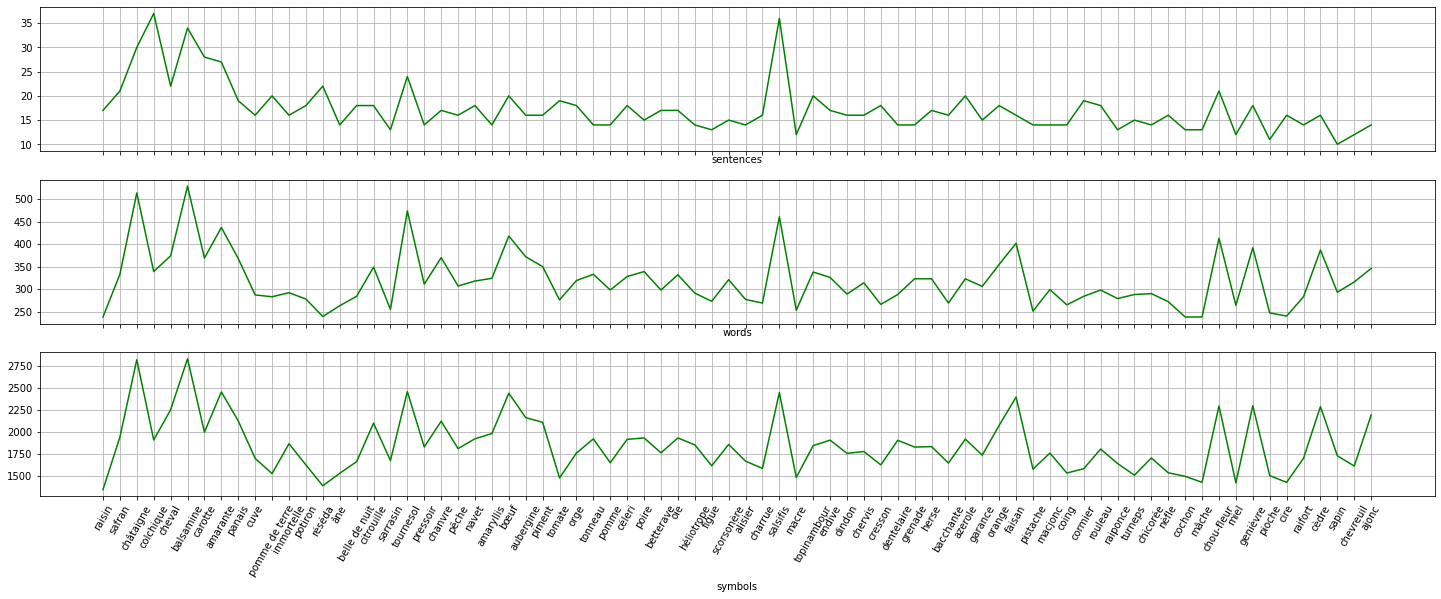

In [ ]:
batch = df#[df["month"] == "frimaire"]

plots = ["sentences", "words", "symbols"]
# plots = ["capitals", "dashes", "questions", "exclamations"]
fig, axs = plt.subplots(len(plots), 1, sharex=True, figsize=(25,3 * len(plots)))
for i in range(len(plots)):
  axs[i].plot(batch["name"], batch[plots[i]], 'g')
  axs[i].set_xlabel(plots[i])
  axs[i].grid()
plt.xticks(rotation=60)
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

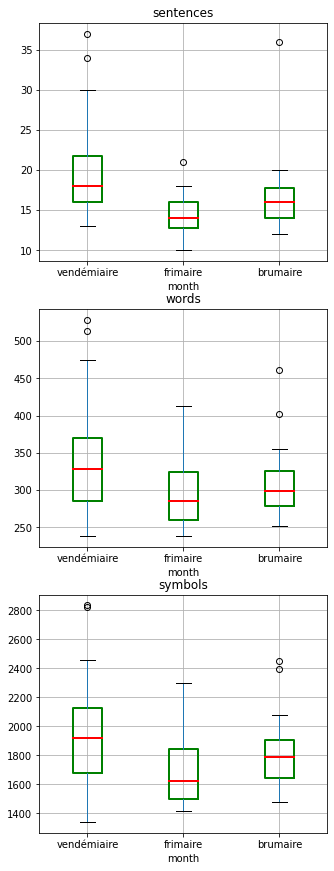

In [ ]:
boxprops = dict(linewidth=2, color='g')
medianprops = dict(linewidth=2, color='r')

# todo: correct month order

plots = ["sentences", "words", "symbols"]
fig, axs = plt.subplots(len(plots), 1, figsize=(5, 5 * len(plots)))
for i in range(len(plots)):
  bp = df.boxplot(column=plots[i], by="month", ax=axs[i], boxprops=boxprops, medianprops=medianprops)
  axs[i].invert_xaxis()
plt.suptitle("")
plt.show()

In [ ]:
target_column = "dashes"
dum_df = pd.get_dummies(data=df, columns=["month", "fandom"]).drop(columns=["name", "text"])
X, y = dum_df.drop(columns=[target_column]), dum_df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

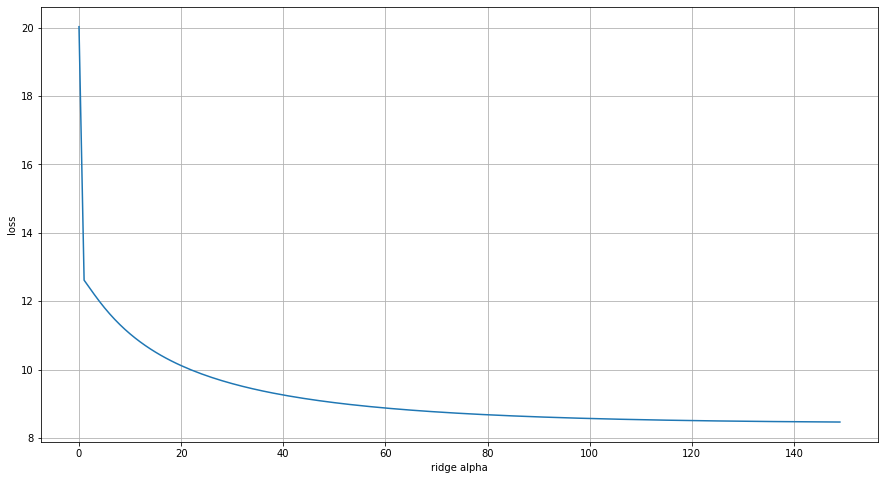

In [ ]:
params = np.arange(0, 150, 1)
# params = np.arange(0, 1, 0.02)

loss = []
for p in params:
  model = Ridge(alpha=p).fit(X_train, y_train)
  y_pred = model.predict(X_test)
  loss.append(mean_squared_error(y_test, y_pred))
plt.plot(params, loss)
plt.grid()
plt.xlabel("ridge alpha")
plt.ylabel("loss")
plt.show()

alpha = params[np.argmin(loss)]

linreg MSE:  13.75
ridge MSE:  8.464708403938866


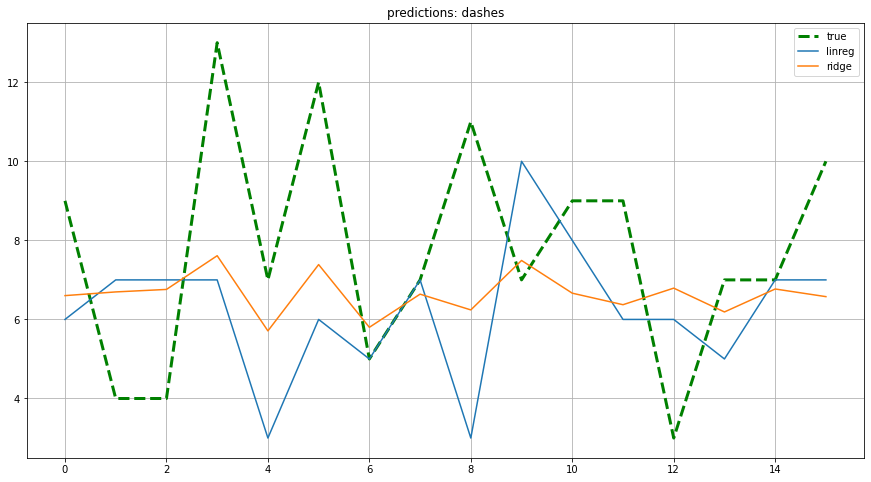

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
y_pred_reg = reg.predict(X_test).astype(int)
ridge = Ridge(alpha=alpha).fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("linreg MSE: ", mean_squared_error(y_test, y_pred_reg))
print("ridge MSE: ", mean_squared_error(y_test, y_pred_ridge))

plt.rcParams["figure.figsize"] = (15, 8)
plt.plot(range(len(y_test)), y_test, label="true", color='g', linewidth=3, linestyle="dashed")
plt.plot(range(len(y_pred_reg)), y_pred_reg, label="linreg")
plt.plot(range(len(y_pred_ridge)), y_pred_ridge, label="ridge")
plt.title("predictions: " + target_column)
plt.grid()
plt.legend()
plt.show()

In [ ]:
ops = list(map(lambda x: x[:findexact(x, " ", 0)], df["text"]))
ops.sort(key=lambda x: x.lower())

In [ ]:
# todo: something that has to do with text processing ?

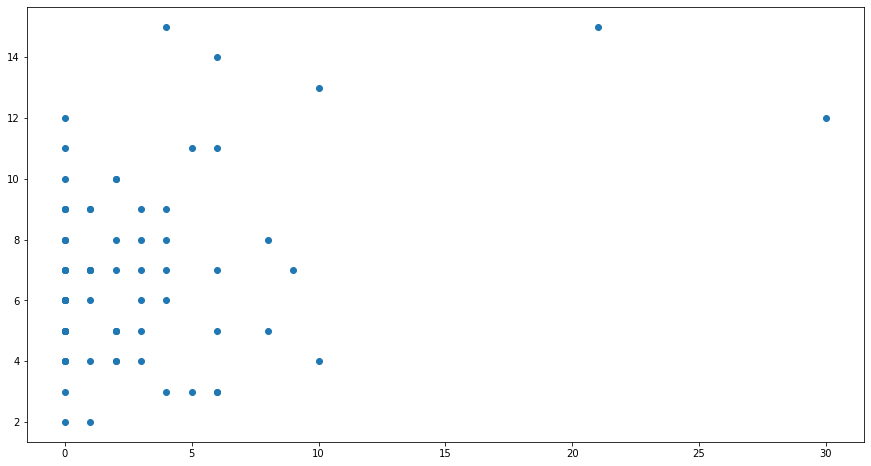

In [ ]:
# todo: figure out classes ?
plt.scatter(df["capitals"], df["dashes"])